# Hoofdstuk 6 Grafieken

### Disclaimer
- De oefeningen zijn wat anders dan in de papieren cursus. De oefeningen in deze Jupyter Notebook zijn eigenlijk interessanter: vandaar.

# Stappenplan voor het maken van grafiek

1. Import matplotlib met **from matplotlib import pyplot as plt**
2. Bepaal het domein van de x-as (met een lijst of een kolom in een dataframe)
3. Bepaal het domein van de y-as (met een functie of een kolom in een dataframe)
4. Kies het soort grafiek (plt.plot, plt.bar, plt.scatter of plt.hist) + bijhorende opties
5. Toon de grafiek 

## In de praktijk

- We werken meestal met de plot.
- Voor de x-as en y-as hangt het er vooral van af of we inzicht willen krijgen in experimentele data, of een model willen visualiseren en/of toetsen. 
- Wanneer je met een model werkt, heb je in principe altijd een functie. We gebruiken dan de **map** om de waarden op de x-as om te zetten in waarden voor de y-as. Voor de x-as gebruik je ofwel een lijst wanneer je het model onafhankelijk wil visualiseren, ofwel gebruik je een kolom uit een dataframe om het model te vergelijken met de gemeten data. Wanneer je een lijst gebruik, kiezen we voor de np.linspace tenzij de functie alleen op gehele waarden werkt: dan gebruiken we de range.
- Wanneer je experimentele data (uit een csv) wil visualiseren, dan import je eerst die csv-data in een dataframe en haal je zowel de waarden op de x-as als op de y-as uit een kolom van het dataframe.   

# Voorbeelden van grafieken zonder opties

## Met een functie

In [1]:
# imports voor alle volgende cellen
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget
from qgridnext import show_grid

In [ ]:
# voorbeeld 1
def plotSinus(aantalFases):
    xAs = np.linspace(0, aantalFases*2*math.pi, 200)
    yAs = list(map(math.sin, xAs))
    plt.figure()
    plt.plot(xAs, yAs)
    plt.show()
    
plotSinus(5)

In [ ]:
# voorbeeld 2
def derdegraads(x):
    return -x**3 + 2*x**2 - 5*x + 7

def plotDerdegraads(begin, einde):
    xAs = np.linspace(begin, einde, 50)
    yAs = list(map(derdegraads, xAs))
    plt.figure()
    plt.plot(xAs, yAs)
    plt.show()
    
plotDerdegraads(-5,5)

De map heeft een functie nodig met één parameter. Voor het plotten van een functie is dat logisch omdat je een plot wil van een y-waarde in functie van een x-waarde. In de voorgaande voorbeelden waren de functies math.sin en derdegraads sowieso functies met één parameter, maar in veel gevallen hebben je functies met meer dan één parameter. Die moet je dan via een lokale functie (= functie in functie) herleiden tot een (hulp-)functie met één parameter. Dat zijn de twee volgende voorbeelden. 

In [ ]:
# voorbeeld 3
def derdegraadsFunctie(a,b,c,d,x):
    return a*x**3 + b*x**2 + c*x + d

def plotDerdegraads_v2(begin, einde):
    def functie(x):
        return derdegraadsFunctie(2,-3,1,-4, x)
    xAs = np.linspace(begin, einde, 50)
    yAs = list(map(functie, xAs))
    plt.figure()
    plt.plot(xAs, yAs)
    plt.show()
    
plotDerdegraads_v2(-5,5)

In [ ]:
# voorbeeld 4 (ook in de cursus)
def kgv(a,b): 
    return (a*b)/math.gcd(a,b)

def grafiekKGV():
    def kgv7(x):
        return kgv(x,7)
    
    xAs = range(1,101)
    yAs = list(map(kgv7, xAs))
    plt.figure()
    plt.plot(xAs, yAs)
    plt.show()

grafiekKGV()

## Met een dataframe

In [ ]:
# voorbeeld 1 (uit de cursus)
def plotDagOpbrengst(): 
    df = pd.read_csv("csv/dagopbrengst.csv", 
                     sep=";", encoding="latin-1") 
    xAs = df["uur"] 
    yAs = df["W"] 
    plt.figure()
    plt.plot(xAs, yAs) 
    plt.show() 

plotDagOpbrengst()

In [ ]:
# voorbeeld 2
def plotIndex(): 
    df = pd.read_csv("csv/consumptie_index_september.csv", 
                     sep=";", encoding="latin-1") 
    xAs = df["jaar"] 
    yAs = df["indexcijfer"] 
    plt.figure()
    plt.plot(xAs, yAs)
    plt.show() 

plotIndex()

# Grafiekopties

## Als (optionele) parameter 

- **color** : bepaalt de kleur van de lijn, bv. *'r'*, *'g'*, *'b'*, *'orange'*, *'purple'*, ... 
- **marker** : markeringen voor de individuele punten, bv. *'x'*, *'o'*, *'s'*, *'8'*, ... 
- **linestyle** : hoe ziet de lijn er uit, bv. *'-'*, *':'*, *'--'*, *'-.'*, ... 
- **label** : geef als waarde een tekst mee, die in de legende verschijnt *als* ook plt.legend() oproept 

## Als extra methodes van plt.

1. **title(*tekst*)** voegt een titel toe bovenaan de grafiek 
2. **grid(True)** zet de grid op 
3. **xlabel(*tekst*)** plaatst tekst op de x-as 
4. **ylabel(*tekst*)** plaatst tekst op de y-as 
5. **legend()** voegt een legende toe aan de grafiek. 
   Belangrijk is dan natuurlijk dat je labels toegevoegd hebt aan de plot. 
6. **text(*xWaarde, yWaarde, tekst*)** plaats tekst op de opgegeven coördinaat 
7. **xscale('symlog')** als de x-as een logaritmische schaal moet krijgen 
8. **yscale('symlog')** als de y-as een logaritmische schaal moet krijgen 


In [ ]:
# voorbeeld met veel toeters en bellen
def plotDagOpbrengstVeelToeters(): 
    df = pd.read_csv("csv/dagopbrengst.csv", 
                     sep=";", encoding="latin-1") 
    xAs = df["uur"] 
    yAs = df["W"] 
    plt.figure()
    plt.plot(xAs, yAs, color='red', marker='x', linestyle=':', label = "dagopbrengst")
    plt.title("Dagopbrengst van zonnepanelen op een wisselvallige dag")
    plt.grid(True)
    plt.xlabel("tijdstip")
    plt.ylabel("W")
    plt.legend()
    plt.show() 

plotDagOpbrengstVeelToeters()

# Oefening 0

Experimenteer met de grafiekopties door 
- de regels met opties en/of de optionele parameters in de voorbeelden met veel toeters en bellen stuk per stuk in commentaar te zetten en na te gaan wat er verandert aan de grafiek
- aan de eerste reeks voorbeelden verschillende opties toe te voegen
 

# Oefeningen uit de cursus

1. Plot de kostprijs van een “gewoon woonhuis” van 1973 tot nu. 
   Gebruik hiervoor het bestand  “immo_national.csv”. 

In [ ]:
# ruimte voor oef. 1
def oef1():
    woningen = pd.read_csv("csv/immo_national.csv",sep=";",encoding="latin-1")
    #TODO vul aan
    plt.figure()
    plt.show()

oef1()


2. Plot het vermogen P in functie van de spanning U volgens de gegevens in zonnepaneel.csv 

In [ ]:
# ruimte voor oef. 2
def oef2():
    zp = pd.read_csv("csv/zonnepaneel.csv",sep=";",encoding="latin-1")
    #TODO vul aan
    plt.figure()
    plt.show()

oef2()

# 6.4 Meer grafieken tegelijk tonen

Voor het overzicht is het dikwijls interessant om verschillende plots/grafieken op zo weinig mogelijk figuren te zetten. Hierbij moet je natuurlijk wel wetenschappelijk verantwoord werken, en de juiste optie kiezen.

## Verschillende grafieken met soortgelijke X- en Y-as 

Wanneer de waarden op de x-as én de y-as dezelfde grootte hebben en liefst ook dezelfde eenheid, kan je ze best helemaal samenzetten.
Voorbeelden zijn:

- een experiment waarbij je de groeisnelheid van een plant bij verschillende temperaturen onderzoekt. Op de x-as staan dan de dagen en op de y-as de hoogte van de plant. Het label per plot is dan de temperatuur van die plot.
- een experiment waarbij je de uitrekking van een elastiek met verschillende dikte evalueert. Op de x-as kan dan de kracht staan die op de elastiek wordt uitgeoefend en op de y-as de lengte van de uitrekking.

### Oplossingsstrategie

De strategie in dit scenario is om de twee (of meer) plotfuncties direct achter elkaar te schrijven (met een verschillend label) voor de plt.show().

In [ ]:
# voorbeeld (zonder eenheden)
def functie1(x):
    return 0.8*x*x - x + 3
def functie2(x):
    return 2.3*x+4

def plotTweeFuncties():
    xAs = np.linspace(-2,5,25)
    yAs1 = list(map(functie1, xAs))
    yAs2 = list(map(functie2, xAs))
    
    plt.figure()
    plt.plot(xAs, yAs1, color="red", marker="o", label="tweedegraadsfunctie")
    plt.plot(xAs, yAs2, color="blue", marker="x", label="tweedegraadsfunctie")
    plt.grid(True)
    plt.show()
    
plotTweeFuncties()

In [ ]:
# Voorbeeld uit de cursus
def verdubbel(x):
    return x*2
def kwadrateer(x):
    return x**2

def tweeGrafiekenInElkaar(): 
    xAs = np.linspace(0, 10, 20) 
    yAs1 = list(map(verdubbel, xAs)) 
    yAs2 = list(map(kwadrateer, xAs)) 
 
    plt.figure()
    plt.plot(xAs, yAs1, "x:", label="verdubbel") 
    plt.plot(xAs, yAs2, "o--", label="kwadrateer") 
    plt.grid() 
    plt.legend() 
    plt.show()
tweeGrafiekenInElkaar()

### Oefeningen (uit de cursus)

3. Plot de functies *y = (x + 2)(x − 1)(x − 2)* en *y = (x + 2)(x + 1)(x − 1)(x − 1.5)* in het bereik van [-2.5, 2,5] 




In [ ]:
# ruimte voor oef. 3
def derdeGraad(x):
    return (x+2)*(x-1)*(x-2)

def vierdeGraad(x):
    return (x+2)*(x+1)*(x-1)*(x-1.5)

def oef3():
    #TODO vul aan
    plt.figure()
    plt.show()

oef3()

4. Uitbreiding van 1: gebruik het bestand “immo_by_province.csv” en plot de historische prijzen van 
gewone woonhuizen voor Antwerpen, Limburg en Vlaams-Brabant

In [ ]:
# ruimte voor oef. 4
def plotWoonhuizenPerProvincie(file="csv/immo_by_province.csv"):
    immo = pd.read_csv(file, sep=";", encoding="latin-1")
    #TODO vul aan
    plt.figure()
    plt.show()

plotWoonhuizenPerProvincie()

##  Twee grafieken met dezelfde x-as maar andere y-as

Wanneer de waarden op de x-as dezelfde zijn, maar de grootte van de waarden op de y-as ligt sterk uit elkaar, dan is het géén goed idee om dezelfde y-as te gebruiken. Stel bijvoorbeeld dat de y-waarden van de ene grafiek varieren tussen 0 en 1 en die van de andere grafiek tussen 100 en 10000, dan zou het verschil in de waarden van de eerste grafiek niet zichtbaar zijn als je dezelfde x-as gebruikt.

Ook wanneer de waarden een andere eenheid hebben, is het niet verantwoord om ze op dezelfde y-as te zetten.

### Oplossingsstrategie

De grote truc om twee verschillende assen op één figuur te krijgen, is het commando twinx() om 
een tweeling-as te creëren. Door het gebruik van twinx() wordt het wel moeilijker om een legende **in** de grafiek te krijgen. In de cursus wordt hiervoor een oplossing beschreven, maar het is al goed als je elke as van de tweeling een eigen label te geven met plt.ylabel(). Je moet dit zowel vòòr als ná de plt.twinx() doen. We raden aan om beide labels een verschillende kleur te 
geven en de twee plots in de bijhorende kleur te tekenen.

In [ ]:
# voorbeeld uit de cursus

def plotTweeAssen(): 
    xAs = list(range(1, 1001, 100)) 
    yAsLinks = list(map(verdubbel, xAs)) 
    yAsRechts = list(map(kwadrateer, xAs)) 
 
    plt.figure()
    plt.ylabel("verdubbel", color="r")   
    plt.plot(xAs, yAsLinks, "r-x") 
 
    plt.twinx() 
    plt.ylabel("kwadrateer",color="b") 
    plt.plot(xAs, yAsRechts, "b--o") 
 
    plt.show()
    
plotTweeAssen()

### Oefeningen

- Importeer het bestand csv/dagopbrengst.csv en voeg een kolom toe met de cumulatieve opbrengst in KWh. Zet zowel de momentele opbrengst als de cumulatieve opbrengst in één grafiek.

In [ ]:
def plotDagopbrengst(file = "csv/dagopbrengst.csv"):
    df = pd.read_csv(file, sep=";", encoding="latin-1")
    #TODO vul aan
    plt.figure()
    plt.show() 
    
plotDagopbrengst()

- Plot de functie cos en tan van 0 tot 2*pi

In [ ]:
def plotGoniometrischeFunctie(begin, einde):
    #TODO vul aan
    plt.figure()
    plt.show()
    
plotGoniometrischeFunctie(0, 2*math.pi)

## Verschillende grafieken met onafhankelijke (x-)assen of vormen

Wanneer je bijvoorbeeld een histogram en een gewone plot naast elkaar wil zetten, of wanneer de x-assen niet gelijk zijn (bv. als je alleen de extreem kleine en de extreem grote waarden van het x-domein wil laten zien), dan kan je best verschillende deelfiguren maken en die groeperen.

Je kan hiervoor uit twee technische aanpakken kiezen:

- ***figs, axes* = plt.subplots(*aantalRijen, aantalKolommen*)** 
- **plt.subplot(*aantalRijen, aantalKolommen, volgnr*)** 

Het ziet er gelijkaardig uit, maar de eerste versie heeft een s vanachter en de tweede versie niet. Ze werken ook anders.

- Bij de eerste versie krijg je twee returnwaarden en moet je vooral met die **axes** werken.  Die variabele is een een- of tweedimensionale lijst van subgrafieken. Wanneer je maar één rij gekozen had, is de lijst ééndimensionaal en kan je met met de vierkante haken [0], [1], [2], ... de verschillende deelfiguren opvragen. Wanneer je verschillende rijen hebt, wordt *axes* een tweedimensionale lijst en moet je twee niveaus van vierkante haken gebruiken, *axes[rij][kolom]*.
- Bij de tweede versie moet je altijd de eerste twee parameters herhalen en bijkomend als derde parameter een volgnummer meegeven. Door die opdracht switcht pyplotlib van context en zullen de volgende instructies op de gekozen deelfiguur uitgevoerd worden.

We geven hieronder twee voorbeelden in de twee verschillende stijlen.

### Twee grafieken naast elkaar met subplots (mét s)

In [1]:
# voorbeeld 1 uit de cursus
def tweeGrafiekenNaastElkaar(): 
    xAs = np.linspace(0, 10, 100) 
    yAs1 = list(map(verdubbel, xAs)) 
    yAs2 = list(map(kwadrateer, xAs)) 
 
    plt.figure()
    figs, axes = plt.subplots(1,2) 
    axes[0].plot(xAs, yAs1) 
    axes[1].plot(xAs, yAs2) 
    plt.show() 
    
tweeGrafiekenNaastElkaar()

NameError: name 'plt' is not defined

### Twee grafieken naast elkaar met subplot (zónder s)

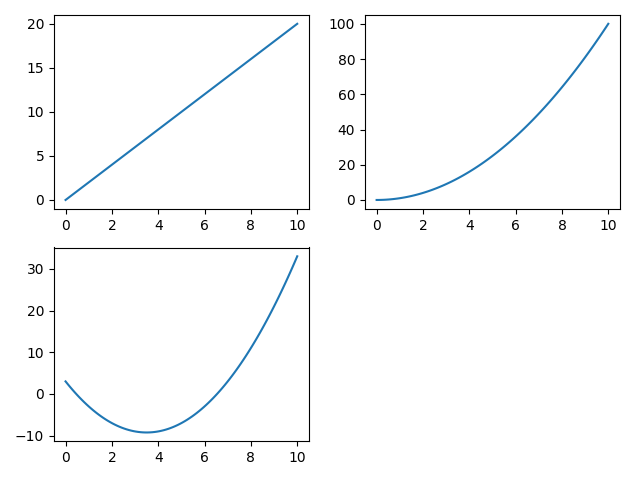

In [8]:
# voorbeeld 1 uit de cursus
plt.close()

def verdubbel(x):
    return 2*x

def kwadrateer(x):
    return x*x

def f3(x):
    return x*x-7*x+3
    
def f4(x):
    return -x*x+11*x+3
    
    
def tweeGrafiekenNaastElkaar2526(): 
    xAs = np.linspace(0, 10, 100) 
    yAs1 = list(map(verdubbel, xAs)) 
    yAs2 = list(map(kwadrateer, xAs)) 
 
    plt.figure()
    plt.subplot(1,2,1)
    plt.plot(xAs, yAs1) 
    
    plt.subplot(1,2,2)
    plt.plot(xAs, yAs2) 

    plt.show() 
    
tweeGrafiekenNaastElkaar2526()

### Vier grafieken in twee rijen met subplots (mét s)

In [ ]:
# voorbeeld 2 uit de cursus
def vierGrafiekenInTweeRijen(): 
    xAs = np.linspace(0, 10, 100) 
    yAs1 = list(map(verdubbel, xAs)) 
    yAs2 = list(map(kwadrateer, xAs)) 
 
    plt.figure()
    figs, axes = plt.subplots(2,2) 
    axes[0,0].plot(xAs, yAs1) 
    axes[0,1].plot(xAs, yAs2) 
 
    xAs2 = range(1,13) 
    ptn = [17,13, 14, 11, 8, 11, 7, 17, 12, 14, 7, 11] 
    axes[1,0].bar(xAs2, ptn) 
    axes[1,1].hist(ptn, 21) # 21 mogelijke punten 
 
    plt.show() 
    
vierGrafiekenInTweeRijen()

### Vier grafieken in twee rijen met subplot (zónder s)

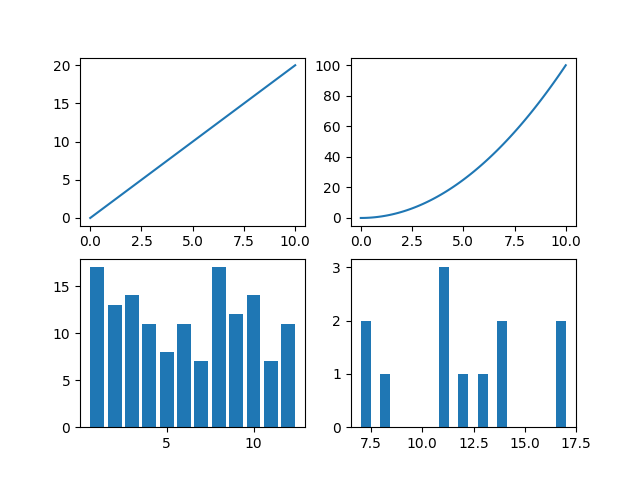

In [10]:
def vierGrafiekenBijElkaar():
    xAs = np.linspace(0, 10, 100)
    yAs1 = list(map(verdubbel, xAs))
    yAs2 = list(map(kwadrateer, xAs))

    plt.figure()
    plt.subplot(2,2,1)
    plt.plot(xAs, yAs1)

    plt.subplot(2,2,2)
    plt.plot(xAs, yAs2)

    plt.subplot(2,2,3)
    xAs2 = range(1,13)
    ptn = [17,13, 14, 11, 8, 11, 7, 17, 12, 14, 7, 11]
    plt.bar(xAs2, ptn)

    plt.subplot(2,2,4)
    plt.hist(ptn, 21) # 21 mogelijke punten

    plt.show()
    
vierGrafiekenBijElkaar()

### Oefening

- Importeer het bestand csv/dagopbrengst.csv en voeg een kolom toe met de cumulatieve opbrengst in KWh. Zet in het linkse deelvenster de momentele opbrengst in W in een staafgrafiek, en zet in het rechts deelvenster de cumulatieve opbrengst in KWh.

In [ ]:
def plotDagopbrengstTweeGrafiekenInElkaar(file = "csv/dagopbrengst.csv"):
    df = pd.read_csv(file, sep=";", encoding="latin-1")
    #TODO vul aan
    plt.figure()
    plt.show() 
    
plotDagopbrengstTweeGrafiekenInElkaar()

# Spelen met de parameters van een grafiek

Het interessante aan programmeren is dat je gemakkelijk verschillende scenario’s kan uitproberen 
door een functie verschillende keren met telkens andere parameters op te roepen, bv. de ene keer *probeer(10)* en de andere keer *probeer(11)*, ...

Met de module **ipywidgets** kan dit nòg gemakkelijker doordat je de gebruiker de kans geeft om parameters via sliders te laten variëren. Nadat je ipywidgets geïmporteerd hebt met **import ipywidgets**, moet je hiervoor volgend scenario volgen:
 
1. Maak de functie met als parameters de waarden die je wil laten variëren, bv. *probeerSnelheid(v)*, *probeerTemperatuur(t)*, ... 
2. De functie moet als laatste regel een plot tonen (*plt.show()*). 
3. Roep de methode ipywidgets.interactive op, bv. *grafiek = ipywidgets.interactive(...)*, met volgende parameters:  
     - Als eerste parameter de functie uit stap 1. 
     - Als volgende parameters alle parameters van de functie uit stap 1.
       Gebruik hiervoor benoemde parameters (zie 3.5) met een initiële waarde, bv. *g = 9.81*. 
   Voor elke benoemde parameter wordt een slider gemaakt worden met een bereik rond die initiële waarde. 
4. Geef de return-waarde (bv. *grafiek*) van stap 3 als parameter mee aan de functie **display** (bv. *display(grafiek)*) . 


In [ ]:
import ipywidgets

# voorbeeld, gebaseerd op het voorbeeld van de cursus
def plotMacht(n, einde): 
    def macht(x): 
        return x**n 
    xAs = list(range(1,einde)) 
    yAs = list(map(macht, xAs)) 
    plt.figure()
    plt.plot(xAs, yAs, linestyle=":", marker="x") 
    plt.title("x tot de macht " + str(n)) 
    plt.show() 
    
import ipywidgets
def plotMachtInteractief():
    grafiek = ipywidgets.interactive(plotMacht, n=3, einde=100)
    display(grafiek)
    
plotMachtInteractief()

## Gevorderde instellingen

ipywidgets kiest het bereik van de slider zelf. In het voorbeeld van hierboven kan *n* van -3 tot +9 gaan, en *einde* van -100 tot +300. Voor *n* kan dat nog, maar voor *einde* niet: daar zijn negatieve waarden onmogelijk. In zo'n geval kan je ook zelf een slider maken en die in de functie *interactive* meegeven als *default waarde* voor de geselecteerde parameter.

Je moet dan kiezen tussen een **IntSlider** of een **FloatSlider** en volgende parameters meegeven:
- *value* de startwaarde,
- *min* de laagst mogelijke waarde voor de slider, 
- *max* de hoogst mogelijke waarde voor de slider, 
- *step* de stapgrootte in de slider, 
- *description* een beschrijving die voor de slider komt.

Zoals steeds wordt dit (waarschijnlijk) duidelijker aan de hand van een voorbeeld. We passen eerst het voorbeeld van hierboven met een eigen slider voor *einde*. 

In [ ]:
# voorbeeld met slider voor het einde van de grafiek
    
def plotMachtInteractief_v2():
    sliderVoorEinde = ipywidgets.IntSlider(value=100, min=25, max=500, step = 5, description = "Eindpunt van het interval")
    grafiek = ipywidgets.interactive(plotMacht, n=3, einde=sliderVoorEinde)
    display(grafiek)
    
plotMachtInteractief_v2()

In de cursus hebben we een voorbeeld met twee zelfgemaakte sliders.

In [ ]:
# laatste voorbeeld uit de cursus
def kwadrateer(x):
    return x**2

def plotVanTot(start, einde): 
    xAs = list(range(start,einde)) 
    yAs = list(map(kwadrateer, xAs)) 
    plt.figure()
    plt.plot(xAs, yAs) 
    plt.title("kwadraat van " + str(start) + " tot " + str(einde)) 
    plt.show() 
    
def plotInteractief(): 
    startSlider = ipywidgets.IntSlider(value=10, min=0, max=20, 
                                       description="Begin van het interval") 
    eindSlider = ipywidgets.IntSlider(value=20, min=10, max=40, 
                                      description="Einde van het interval") 
    grafiek = ipywidgets.interactive(plotVanTot, start=startSlider, einde=eindSlider) 
    display(grafiek) 
    
plotInteractief()

In [ ]:
# extra voorbeeld
def plotVierdegraadsWidgets():
    aSlider = ipywidgets.FloatSlider(value=0.25, min=-10, max=10, description="a")
    bSlider = ipywidgets.FloatSlider(value=0.25, min=-10, max=10, description="b")
    cSlider = ipywidgets.FloatSlider(value=0.25, min=-10, max=10, description="c")
    dSlider = ipywidgets.FloatSlider(value=0.25, min=-10, max=10, description="d")
    eSlider = ipywidgets.FloatSlider(value=0.25, min=-10, max=10, description="e")
    startSlider = ipywidgets.FloatSlider(value=-100, min=-200, max=0, description="start")
    eindSlider = ipywidgets.FloatSlider(value=100, min=-0, max=200, description="eind")
    def plotter(a,b,c,d,e,begin,einde):
        xAs = np.linspace(begin, einde, 50)
        yAs = list(map(lambda x: a*x**4+b*x**3+c*x**2+d*x+e, xAs))
        plt.figure()
        plt.plot(xAs, yAs)
        plt.show()
    grafiek = ipywidgets.interactive(plotter, a=aSlider, b=bSlider, c=cSlider, d=dSlider, e=eSlider, begin=startSlider, einde=eindSlider) 
    display(grafiek) 
    
plotVierdegraadsWidgets()

In [ ]:
plt.close()

## Oefeningen

- Pas het voorbeeld *plotMachtInteractief_v2* aan zodat je voor de graad van de veelterm een slider met reële getallen gebruikt.

In [ ]:
def plotMachtInteractief_v3():
    #TODO vul aan
    pass

plotMachtInteractief_v3()

- Variant van oefening 6 van de cursus
  Twee vrienden wonen op 22 kilometer afstand van elkaar, en willen iets gaan drinken/sporten/kaarten/discussiëren op een plek die tussen elkaar in ligt. De ene vriend moet met de fiets rijden en rijdt liefst tussen de 15 en 22 km/u, maar kan ook wel een spurtje trekken voor zijn vriend; de andere vriend gebruikt een elektrische motorfiets met een kruissnelheid van rond de 40 km/u met een maximum van 45 km/u, maar de vriend kan ook wel wat trager rijden om batterij te besparen.
  
  Hiervoor krijg je functies *afstandVriend1* en *afstandVriend2* die de afstand t.o.v. van het vertrekpunt van vriend 1 terug geven in functie van de tijd en de snelheid. Voor *afstandVriend1* loopt de afstand op vanaf 0 richting 22; voor *afstandVriend2* daalt de afstand van 22 richting 0. Als je deze twee afstandsfuncties zou plotten, geeft het snijpunt van de twee lijnen de plaats weer waar de vrienden elkaar tegenkomen. De plaatsen waar ze warm en droog kunnen afspreken, liggen op 5 en 10 km van de vertrekplaats van vriend 1 verwijderd.
  
  **Maak een interactieve grafiek waarin je de snelheden van beide vrienden kan aanpassen. Zoek comfortabele snelheden waarmee ze op respectievelijk 5 of 10 km kunnen afspreken, of waarbij ze elk 20 minuten moeten rijden.**

In [ ]:
def afstandVriend1(tijdInMinuten, snelheidKmPerU):
    return snelheidKmPerU*tijdInMinuten/60

def afstandVriend2(tijdInMinuten, snelheidKmPerU):
    return 22 - snelheidKmPerU*tijdInMinuten/60

def plotAfstanden(snelheidFiets, snelheidMotorfiets):
    # maak eerst lokale functies met één parameter
    
    # bepaal x-as en beide y-assen
    
    # plot beide grafieken
    
    plt.figure()
    plt.show()    
    
def zoekSnelhedenVrienden():
    #TODO vul aan
    pass

zoekSnelhedenVrienden()    
    

- Een variant van de laatste oefening van hoofdstuk 5: de diepvriezers.
  In het csv-bestand diepvries.csv staan de aankoopprijs en het verbruik per jaar in KWh van 4 diepvriezers. In die oefening was gevraagd om de kostprijs na 10 jaar te berekenen bij een elektriciteitsprijs van 28 eurocent/KWh en 40 eurocent/KWh.
  In deze variant van de oefening vragen we om de gecumuleerde kostprijs van alle diepvriezers op een grafiek te zetten met op de x-as de tijd in jaar en op de y-as de prijs van aankoop + verbruik over de afgelopen jaren. 
  Voorzie een slider waarmee je de kostprijs kan laten variëren tussen aannemelijke grenzen en kijk welke invloed dit heeft op de tijd waarop een nieuwe, energieëfficiënte diepvriezer zichzelf terugverdiend heeft.

In [ ]:
# ruimte voor de oefening op de diepvriezer


5. Maak opgave 5 uit de cursus (dit is een oefening zonder sliders): slimme grafiek van ax²+bx+c 
- Maak functies om volgende dingen te berekenen 
    - Eerste nulpunt 
    - Tweede nulpunt 
- Maak functie die parameters a, b, c heeft en  
    - Nagaat of er 0, 1 of 2 nulpunten zijn 
    - Indien 0 nulpunten, grafiek van -20 tot +20 
    - Indien 1 nulpunten “y”, grafiek van y-20 tot y+20 
    - Indien 2 nulpunten “y1” en “y2”, bereken afstand tussen y1 en y2 (“afst”) en grafiek van y1-afst tot y2+afst 

In [ ]:
# ruimte voor oef. 5

*Oefening 7 uit de cursus vervalt*
